In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

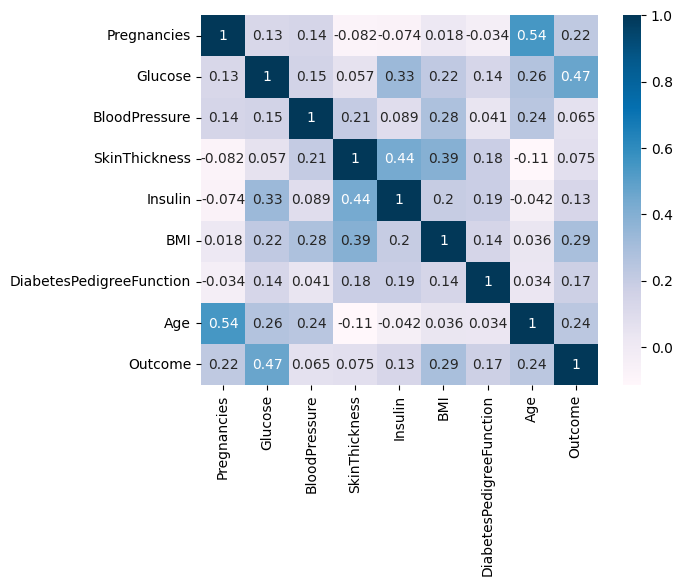

In [5]:
sns.heatmap(diabetes_dataset.corr(numeric_only=True), cmap = 'PuBu', annot = True)

In [6]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
diabetes_dataset.groupby('Outcome').mean(numeric_only = True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
X = diabetes_dataset.drop(columns = 'Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [12]:
clf = svm.SVC(kernel = 'linear', C = 1)

In [13]:
clf.fit(X_train, Y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
X_train_preds = clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_preds, Y_train)

In [15]:
training_data_accuracy

0.7866449511400652

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

In [29]:
lsv_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C = 1, random_state = 2, max_iter=10_000)
)
lsv_clf.fit(X_train, Y_train)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [30]:
X_input = [[2,197,70,45,543,30.5,0.158,53]]
lsv_clf.predict(X_input)

array([1])

In [31]:
lsv_clf.decision_function(X_input)

array([457421.02643936])

In [32]:
accuracy = lsv_clf.score(X_train, Y_train)
accuracy

0.9120521172638436

In [21]:
 from sklearn.svm import SVC

In [27]:
 poly_kernel_sv_clf = make_pipeline(
     StandardScaler(),
     SVC(kernel="poly", degree=3, coef0=1, C=1)
 )
 poly_kernel_sv_clf.fit(X_train, Y_train)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1
,kernel,'poly'
,degree,3
,gamma,'scale'


In [28]:
accuracy = poly_kernel_sv_clf.score(X_train, Y_train)
accuracy

0.8452768729641694

In [24]:
rbf_kernel_sv_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=5, C=1)
)
rbf_kernel_sv_clf.fit(X_train, Y_train)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1
,kernel,'rbf'
,degree,3
,gamma,5


In [25]:
accuracy = rbf_kernel_sv_clf.score(X_train, Y_train)
accuracy

1.0

# Both rbf_kernel_sv_clf abd lsv_clf overfit the data. Thus we go back to our normal SVM clf.

In [34]:
Y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(Y_test_pred, Y_test)
test_accuracy

0.7727272727272727